# Air_Foil_DataSet

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Load the dataset

In [2]:
# Now we use read.csv() function from pandas to read the data from the csv and stores in the form of a data frame

df = pd.read_csv("air.csv")

### View the data

In [3]:
df

,Frequency,Angle of Attack,chord_length,Free_stream,Suction Side,Scaled Sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1499,2500,15.6,0.1016,39.6,0.052849,110.264
1500,3150,15.6,0.1016,39.6,0.052849,109.254
1501,4000,15.6,0.1016,39.6,0.052849,106.604
1502,5000,15.6,0.1016,39.6,0.052849,106.224


### Deep copy and Shallow copy

In [4]:
data = df    # will be using data further by creating a copy from df so that the original is intact

In [5]:
# View the copied dataframe
data

,Frequency,Angle of Attack,chord_length,Free_stream,Suction Side,Scaled Sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1499,2500,15.6,0.1016,39.6,0.052849,110.264
1500,3150,15.6,0.1016,39.6,0.052849,109.254
1501,4000,15.6,0.1016,39.6,0.052849,106.604
1502,5000,15.6,0.1016,39.6,0.052849,106.224


### Exploratory Data Analysis

In [6]:
# using head function we can retreive the top data

data.head()

,Frequency,Angle of Attack,chord_length,Free_stream,Suction Side,Scaled Sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
# using tail function we can retreive the bottom data

data.tail()

,Frequency,Angle of Attack,chord_length,Free_stream,Suction Side,Scaled Sound
1499,2500,15.6,0.1016,39.6,0.052849,110.264
1500,3150,15.6,0.1016,39.6,0.052849,109.254
1501,4000,15.6,0.1016,39.6,0.052849,106.604
1502,5000,15.6,0.1016,39.6,0.052849,106.224
1503,6300,15.6,0.1016,39.6,0.052849,104.204


In [8]:
# We use .describe function to see the basic statistics details of the data.

data.describe()

,Frequency,Angle of Attack,chord_length,Free_stream,Suction Side,Scaled Sound
count,1504.00000,1503.000000,1504.000000,1503.000000,1503.000000,1503.000000
mean,2885.12633,6.782302,0.136593,50.860745,0.011140,124.835943
std,3151.89955,5.918128,0.093526,15.572784,0.013150,6.898657
min,200.00000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.00000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.00000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.00000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.00000,22.200000,0.304800,71.300000,0.058411,140.987000


In [9]:
# Get the information about the AirFoil dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Frequency        1504 non-null   int64  
 1   Angle of Attack  1503 non-null   float64
 2   chord_length     1504 non-null   float64
 3   Free_stream      1503 non-null   float64
 4   Suction Side     1503 non-null   float64
 5   Scaled Sound     1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [10]:
# .shape gives the tuple of the rows and the columns 

data.shape

(1504, 6)

In [11]:
# Missing Data

data.isnull().sum()

Frequency          0
Angle of Attack    1
chord_length       0
Free_stream        1
Suction Side       1
Scaled Sound       1
dtype: int64

### Preprocessing

In [12]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()

new_data = pd.DataFrame(my_imputer.fit_transform(data))

new_data.columns = data.columns    #For getting same column name

In [13]:
new_data.isnull().sum()

Frequency          0
Angle of Attack    0
chord_length       0
Free_stream        0
Suction Side       0
Scaled Sound       0
dtype: int64

In [14]:
# statistics details of the new_data.

new_data.describe()

,Frequency,Angle of Attack,chord_length,Free_stream,Suction Side,Scaled Sound
count,1504.00000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,2885.12633,6.782302,0.136593,50.860745,0.011140,124.835943
std,3151.89955,5.916159,0.093526,15.567603,0.013146,6.896361
min,200.00000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.00000,2.000000,0.050800,39.600000,0.002535,120.192000
50%,1600.00000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.00000,9.900000,0.228600,71.300000,0.015312,129.993250
max,20000.00000,22.200000,0.304800,71.300000,0.058411,140.987000


### OUTLIERS:

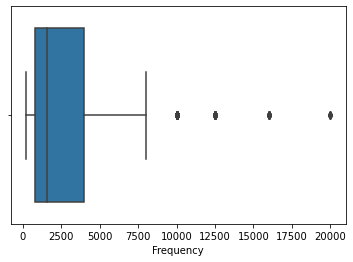

In [14]:
# Finding the Outliers in Frequency column:

outlier = sns.boxplot(x='Frequency', data=new_data)

In [15]:
def outlier(Frequency):
    sorted(Frequency)
    Q1,Q3 = np.percentile(Frequency, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

low,up = outlier(new_data.Frequency)
print(low)
print(up)

-4000.0
8800.0


In [16]:
new_data[(new_data.Frequency < low) | (new_data.Frequency > up)]

,Frequency,Angle of Attack,chord_length,Free_stream,Suction Side,Scaled Sound
11,10000.0,0.0,0.3048,71.3,0.002663,115.391
12,12500.0,0.0,0.3048,71.3,0.002663,112.241
13,16000.0,0.0,0.3048,71.3,0.002663,108.721
27,10000.0,0.0,0.3048,55.5,0.002831,113.076
28,12500.0,0.0,0.3048,55.5,0.002831,111.076
...,...,...,...,...,...,...
1281,10000.0,0.0,0.1016,39.6,0.001463,119.561
1294,10000.0,0.0,0.1016,31.7,0.001501,115.893
1306,10000.0,3.3,0.1016,71.3,0.002028,116.694
1319,10000.0,3.3,0.1016,55.5,0.002211,115.659


In [17]:
new_data.drop(new_data[(new_data.Frequency < low) | (new_data.Frequency > up)].index, inplace=True)

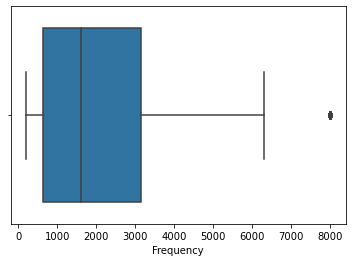

In [18]:
# After removing the outliers in Frequency column

outlier = sns.boxplot(x='Frequency', data=new_data)

## Feature Selection

In [19]:
# SPLLITING DATASET
X = new_data[['Frequency','Angle of Attack','chord_length','Free_stream','Suction Side']]
y = new_data[['Scaled Sound']]

In [20]:
# FEATURE SELECTION - UNIVERATE SELECTION
# PEARSON'S CORRELATION FEATURE SELECTION
# (DO NOT ACCEPT NEGATIVE VALUES)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k=4)
fit = bestfeatures.fit(X,y)

In [21]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(new_data.columns)

# CONCAT TWO DATAFRAMES FOR BETTER VISUALIZATION 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['col_names','accuracy']              # NAMING THE DATAFRAME COLUMNS
print(featureScores.nlargest(4,'accuracy'))                   # PRINT THE BEST FEATURES

         col_names    accuracy
0        Frequency  230.720833
4     Suction Side  225.571529
1  Angle of Attack   67.663036
2     chord_length   58.096572


### Split the dataset

In [22]:
# Split X and Y

X1 = new_data[['Frequency','Angle of Attack','chord_length','Suction Side']]   
y1 = new_data[['Scaled Sound']]

In [23]:
X1

,Frequency,Angle of Attack,chord_length,Suction Side
0,800.0,0.0,0.3048,0.002663
1,1000.0,0.0,0.3048,0.002663
2,1250.0,0.0,0.3048,0.002663
3,1600.0,0.0,0.3048,0.002663
4,2000.0,0.0,0.3048,0.002663
...,...,...,...,...
1499,2500.0,15.6,0.1016,0.052849
1500,3150.0,15.6,0.1016,0.052849
1501,4000.0,15.6,0.1016,0.052849
1502,5000.0,15.6,0.1016,0.052849


In [24]:
y1

,Scaled Sound
0,126.201
1,125.201
2,125.951
3,127.591
4,127.461
...,...
1499,110.264
1500,109.254
1501,106.604
1502,106.224


In [25]:
# .shape gives the tuple of the rows and the columns 

X1.shape, y1.shape

((1418, 4), (1418, 1))

##  Visualization

In [37]:
#Correlation:

new_data.corr()

,Frequency,Angle of Attack,chord_length,Free_stream,Suction Side,Scaled Sound
Frequency,1.000000,-0.194741,0.005600,0.064566,-0.168815,-0.374312
Angle of Attack,-0.194741,1.000000,-0.535569,0.082763,0.747251,-0.213554
chord_length,0.005600,-0.535569,1.000000,-0.009827,-0.237655,-0.198524
Free_stream,0.064566,0.082763,-0.009827,1.000000,0.014520,0.173753
Suction Side,-0.168815,0.747251,-0.237655,0.014520,1.000000,-0.370691
Scaled Sound,-0.374312,-0.213554,-0.198524,0.173753,-0.370691,1.000000


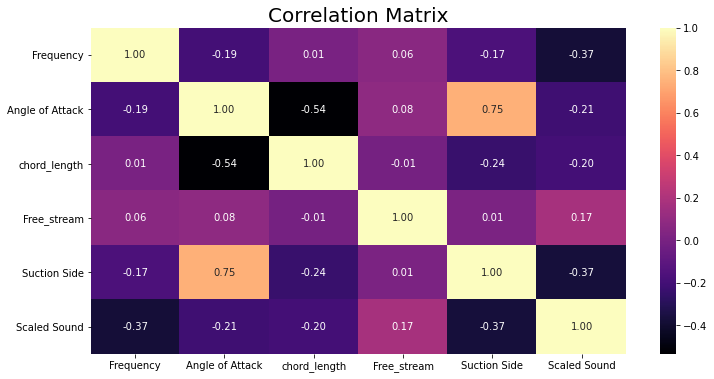

In [26]:
# Correlation matrix visualization

f, ax = plt.subplots(figsize= [12, 6])
sns.heatmap(new_data.corr(), annot=True, fmt=".2f", cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [39]:
corrmat = new_data.corr()
top_corr_features = corrmat.index

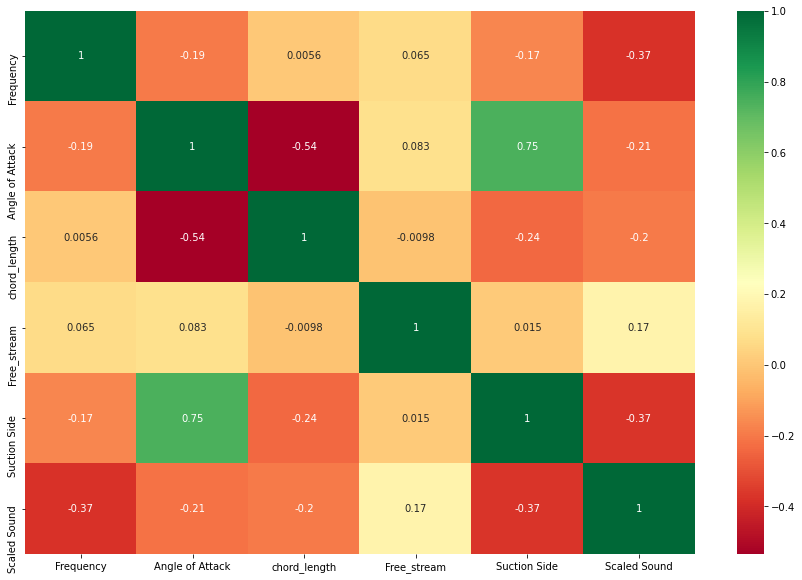

In [41]:
plt.figure(figsize=(15,10))
# PLOT THE HEAT MAP
g=sns.heatmap(new_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

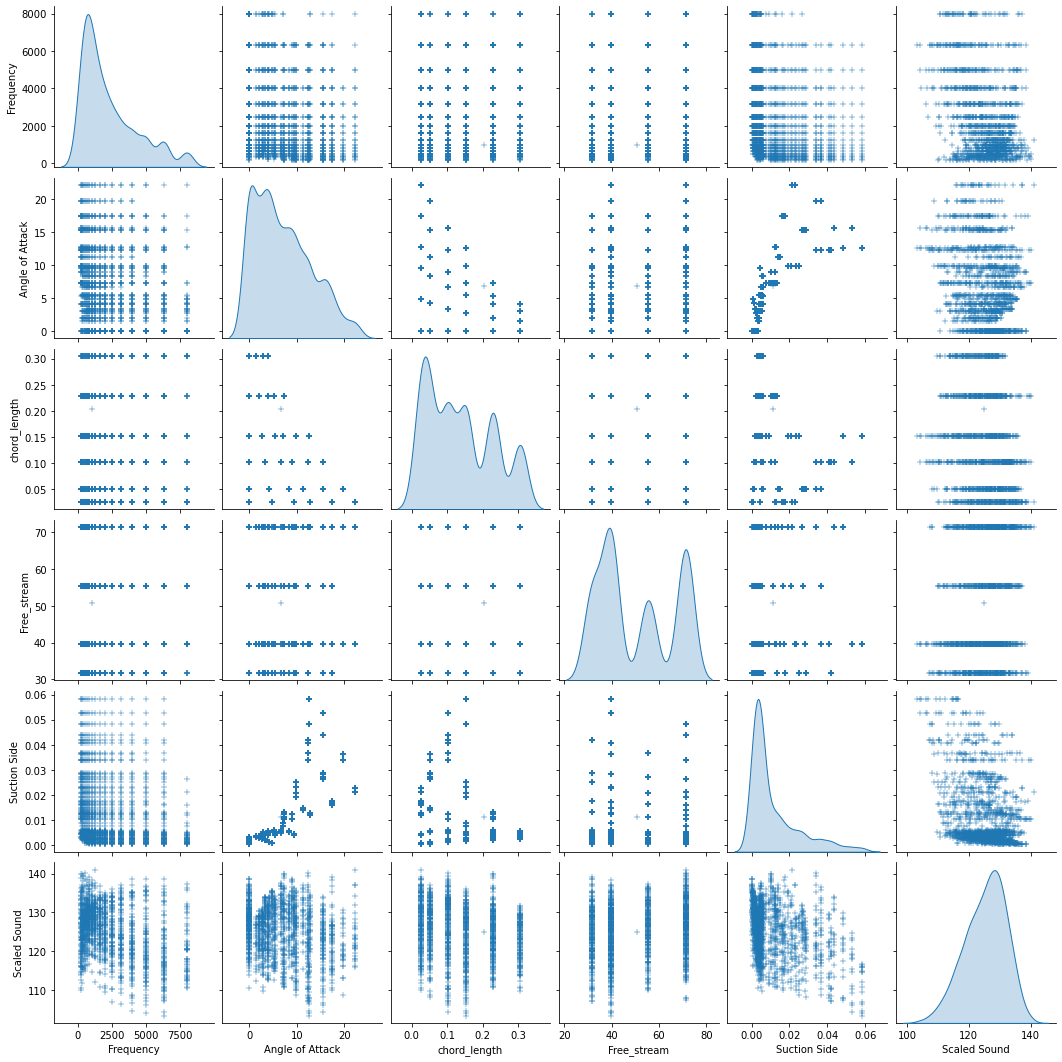

In [27]:
# we use sns.pairplot to automatically plot several different charts for pairs of features within a dataframe.

sns.pairplot(new_data, diag_kind='kde', markers='+')

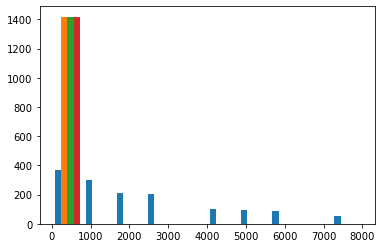

In [42]:
# Visual representation of X split by Histogram:

plt.hist(X1)
plt.show()

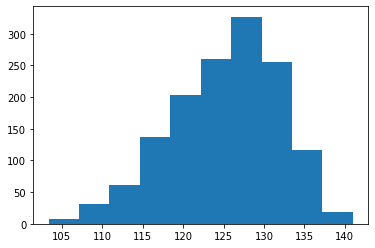

In [43]:
# Visual representation of y split by Histogram:

plt.hist(y1)
plt.show()

<AxesSubplot:title={'center':'Relation between Frequency and Scaled Sound'}, xlabel='Frequency', ylabel='Scaled Sound'>

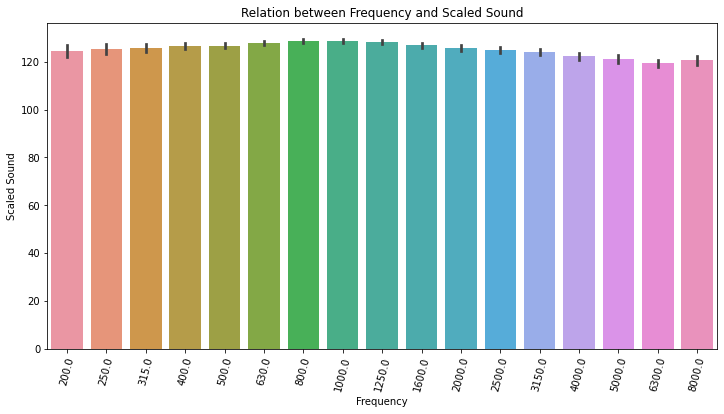

In [44]:
plt.figure(figsize=[12, 6])
plt.title('Relation between Frequency and Scaled Sound')
plt.xticks(rotation=75)
sns.barplot(x='Frequency', y='Scaled Sound', data=new_data)

<AxesSubplot:title={'center':'Comparision with Angle of Attack on Scaled Sound'}, xlabel='Angle of Attack', ylabel='Scaled Sound'>

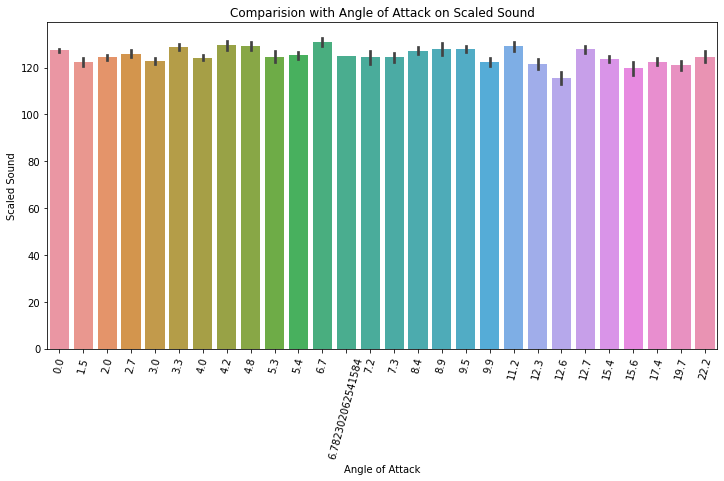

In [45]:
plt.figure(figsize=[12, 6])
plt.title('Comparision with Angle of Attack on Scaled Sound')
plt.xticks(rotation=75)
sns.barplot(x='Angle of Attack', y='Scaled Sound', data=new_data)

<AxesSubplot:title={'center':'Skewness of Scaled Sound'}, xlabel='Scaled Sound', ylabel='Density'>

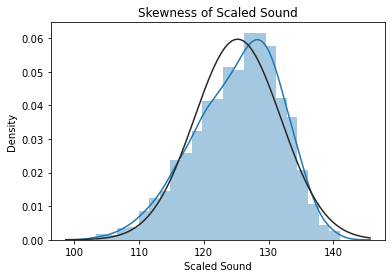

In [46]:
#Skewness:(feature- dependent variable)

plt.title('Skewness of Scaled Sound')
sns.distplot(new_data['Scaled Sound'], fit=norm)

### train and test split method

In [26]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=12)

### Apply the model:

In [27]:
# Linear Algorithm

from sklearn import linear_model 
model = linear_model.LinearRegression()

model.fit(X1_train, y1_train)

LinearRegression()

#### Now we have trained the model based on X and y
#### So,We are going to predict the test data based upon the trained data

In [28]:
y1_pred = model.predict(X1_test)

In [29]:
y1_pred

array([[126.93000781],
       [121.95899334],
       [127.51032201],
       [125.50019019],
       [121.14858049],
       [126.32125356],
       [131.00353962],
       [118.35802598],
       [121.18196701],
       [119.86589144],
       [122.28713355],
       [132.09462201],
       [130.33936203],
       [126.17673859],
       [124.81630297],
       [118.29866493],
       [113.28883201],
       [119.13948174],
       [125.06293119],
       [126.91168076],
       [124.27792002],
       [125.19121773],
       [124.47844327],
       [114.89842894],
       [120.79224521],
       [126.00316648],
       [127.69339322],
       [125.52514407],
       [123.2121305 ],
       [124.66273348],
       [119.45997004],
       [125.93275476],
       [126.59162757],
       [127.86354994],
       [129.60305048],
       [125.39147359],
       [124.9011091 ],
       [128.91080637],
       [125.76370938],
       [129.00780997],
       [129.22136104],
       [121.84322189],
       [122.12800419],
       [126

In [30]:
# prediction with new value

print(model.predict([[800,0,0.3048,0.00266337]]))    # 126.201_ans

[[126.34956368]]


### R2 Score

In [31]:
from sklearn.metrics import r2_score 

print("R2 Score",r2_score(y1_test, y1_pred))

R2 Score 0.4655020593843494


## Other Statistics (Evaluation Metrics) 

### Explained Variance Score

In [32]:
from sklearn.metrics import explained_variance_score

print("Explained Variance Score",explained_variance_score(y1_test, y1_pred))

Explained Variance Score 0.47061477163224386


### Mean Absolute Error

In [33]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error",mean_absolute_error(y1_test, y1_pred))

Mean Absolute Error 3.66775350040351


### Mean Squared Error

In [34]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error",mean_squared_error(y1_test, y1_pred))

Mean Squared Error 23.073970211422232


### Mean Squared Log Error

In [35]:
from sklearn.metrics import mean_squared_log_error

print("Mean Squared Log Error",mean_squared_log_error(y1_test, y1_pred))

Mean Squared Log Error 0.001429896750303396


### Median Absolute Error

In [36]:
from sklearn.metrics import median_absolute_error

print("Median Absolute Error",median_absolute_error(y1_test, y1_pred))

Median Absolute Error 2.87370644789938


# Accuracy:

### This method is called train and test split method. Here we can find the accuracy of the data based upon the model that we are training. In the below cell we have used linear regression.

# Linear Regression Algorithm

In [28]:
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=12)
new_model = linear_model.LinearRegression()
new_model.fit(X1_train, y1_train) 
y1_pred = new_model.predict(X1_test)
print("R2 Score",r2_score(y1_test, y1_pred)) 

R2 Score 0.4655020593843494


#### Trying with various regression algorithms and to conclude one best fit algorithm

# Ridge Algorithm

In [30]:
from sklearn.linear_model import Ridge

model_RD = Ridge()
model_RD.fit(X1_train, y1_train)
y1_pred = model_RD.predict(X1_test)
print("R2 Score",r2_score(y1_test,y1_pred))

R2 Score 0.3960324843200971


# Lasso Algorithm

In [31]:
from sklearn.linear_model import Lasso 

model_LS = Lasso()
model_LS.fit(X1_train, y1_train)
y1_pred = model_LS.predict(X1_test)
print("R2 Score",r2_score(y1_test,y1_pred))

R2 Score 0.13509539975961304


# Elastic Net Regression Algorithm

In [32]:
from sklearn.linear_model import ElasticNet 

model_EN = ElasticNet()
model_EN.fit(X1_train, y1_train)
y1_pred = model_EN.predict(X1_test)
print("R2 Score",r2_score(y1_test,y1_pred))

R2 Score 0.13527017712573575


# Support Vector Algorithm

In [34]:
from sklearn import svm 

model = svm.SVR(kernel='rbf', C=1000)
model.fit(X1_train, y1_train) 
y1_pred = model.predict(X1_test) 
print("R2 Score",r2_score(y1_test,y1_pred))

R2 Score 0.0975359947550487


# Random Forest Regreesion Algorithm

In [35]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(max_depth=5, random_state=0)
model_RF.fit(X1_train, y1_train)
y1_pred = model_RF.predict(X1_test)

print("R2 Score",r2_score(y1_test, y1_pred))

R2 Score 0.7148887126865353


# Gradien Booster Algorithm

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

print("R2 Score",r2_score(y1_test, y1_pred))

R2 Score 0.8324980654984994


# Conclusion

## For this Air Foil dataset Gradient Booster Algorithm is the best fit algorithm by applying feature selection process, as it gives the maximum accuracy of 83%